In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import matplotlib.pyplot as plt

import graphviz
import math


In [ ]:
#train_merged=pd.read_pickle('/content/drive/MyDrive/Final_Hack/train_withgroupby')
# train_1=pd.read_pickle('/content/drive/MyDrive/Final_Hack/C1_data')
# train_2=pd.read_pickle('/content/drive/MyDrive/Final_Hack/C2_data')
# train_3=pd.read_pickle('/content/drive/MyDrive/Final_Hack/C3_data')
train_merge=pd.read_pickle('/content/drive/MyDrive/Final_Hack/result/Full_T_Encoded_data')
#train_merged=pd.read_pickle('/content/drive/MyDrive/Final_Hack/train_WithoutLastmonths')
#train_merged=pd.read_csv('/content/drive/MyDrive/Final_Hack/train_without_Outlier.csv')

In [ ]:
train_m=pd.merge(train_1,train_2,left_index=True,right_index=True,how='left')

In [ ]:
train_merge=pd.merge(train_m,train_3,left_index=True,right_index=True,how='left')

In [ ]:
train_merge.drop(['unit_sales_x','unit_sales_y'],axis=1,inplace=True)

In [ ]:
##Adding features like lag
num_lag=10
for lag in range(1,num_lag+1):
  train_merge['lag_'+str(lag)]=train_merge.unit_sales.shift(lag)


In [ ]:
train_merge.dtypes

locationId          float64
category_of_item    float32
month               float32
item_id             float32
onpromotion           int64
city                float32
state               float32
type                float32
class               float32
dayofweek           float32
unit_sales          float64
dtype: object

In [ ]:
#train_merge.drop('date', axis=1, inplace=True)
train_merge.drop('item_id', axis=1, inplace=True)
train_merge.drop('class', axis=1, inplace=True)
train_merge.drop('locationId', axis=1, inplace=True)
train_merge.drop('onpromotion', axis=1, inplace=True)
train_merge.drop('type', axis=1, inplace=True)
train_merge.drop('city', axis=1, inplace=True)
train_merge.drop('state', axis=1, inplace=True)
train_merge.drop('day', axis=1, inplace=True)
#to reduce complete dataset
#train_merged.drop('cluster',axis=1,inplace=True)

KeyError: ignored

In [ ]:
train_merged.drop('year',axis=1,inplace=True)

In [ ]:
#train_merged['day']=train_merged['day'].astype('category')

In [ ]:
# train_merged['month']=train_merged['month'].astype('category')
# train_merged['dayofweek']=train_merged['dayofweek'].astype('category')
# #only for all dataset
# train_merged['cluster']=train_merged['cluster'].astype('category')
train_merged['perishable']=train_merged['perishable'].astype('category')

train_merged['category_of_item']=train_merged['category_of_item'].astype('category')

In [ ]:
#train_merged.drop('Unnamed: 0',axis=1,inplace=True)
train_merge.to_pickle('/content/drive/MyDrive/Final_Hack/result/Full_T_Encoded_data')

In [ ]:
!pip install seaborn 

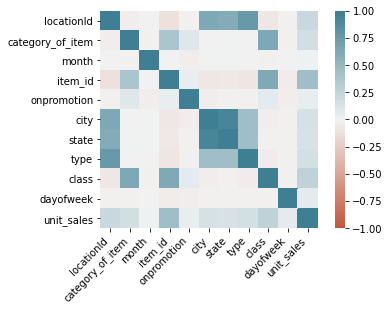

In [ ]:
import seaborn as sns
corr = train_merge.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [ ]:
train_merge.fillna(0,inplace=True)

In [ ]:
train_merge.head()


,locationId,category_of_item,month,item_id,onpromotion,city,state,type,class,dayofweek,unit_sales
0,3.919831,5.793065,5.133624,4.438550,0,3.919831,4.233805,4.857485,4.663194,4.95274,7.0
1,3.919831,4.970956,5.133624,8.483656,0,3.919831,4.233805,4.857485,6.517628,4.95274,1.0
2,3.919831,4.970956,5.133624,9.806715,0,3.919831,4.233805,4.857485,6.517628,4.95274,2.0
3,3.919831,4.970956,5.133624,2.456337,0,3.919831,4.233805,4.857485,3.007533,4.95274,1.0
4,3.919831,4.527270,5.133624,3.763999,0,3.919831,4.233805,4.857485,4.807457,4.95274,1.0


In [ ]:
train_merge.drop('onpromotion',axis=1,inplace=True)

train_merge.drop('city',axis=1,inplace=True)


In [ ]:
train_merge.dtypes

category_of_item    float32
month               float32
dayofweek           float32
unit_sales          float64
lag_1               float64
lag_2               float64
lag_3               float64
lag_4               float64
lag_5               float64
lag_6               float64
lag_7               float64
lag_8               float64
lag_9               float64
lag_10              float64
dtype: object

In [ ]:
train_merge['lag_1']=train_merge['lag_1'].astype('float32')
train_merge['lag_2']=train_merge['lag_2'].astype('float32')
train_merge['lag_3']=train_merge['lag_3'].astype('float32')
train_merge['lag_4']=train_merge['lag_4'].astype('float32')
train_merge['lag_5']=train_merge['lag_5'].astype('float32')
train_merge['lag_6']=train_merge['lag_6'].astype('float32')
train_merge['lag_7']=train_merge['lag_7'].astype('float32')
train_merge['lag_8']=train_merge['lag_8'].astype('float32')
train_merge['lag_9']=train_merge['lag_9'].astype('float32')
train_merge['lag_10']=train_merge['lag_10'].astype('float32')
#train_merge['unit_sales']=train_merged['unit_sales'].astype('float16')

In [ ]:
cols_to_transform = train_merged.select_dtypes(include=['category','uint8']).columns
train_merged = pd.get_dummies(columns=cols_to_transform, data=train_merged, prefix=cols_to_transform, prefix_sep="_",drop_first=True)

In [ ]:
train_merge.head()

,locationId,category_of_item,month,item_id,onpromotion,city,state,type,class,dayofweek,unit_sales
0,3.919831,5.793065,5.133624,4.438550,0,3.919831,4.233805,4.857485,4.663194,4.95274,7.0
1,3.919831,4.970956,5.133624,8.483656,0,3.919831,4.233805,4.857485,6.517628,4.95274,1.0
2,3.919831,4.970956,5.133624,9.806715,0,3.919831,4.233805,4.857485,6.517628,4.95274,2.0
3,3.919831,4.970956,5.133624,2.456337,0,3.919831,4.233805,4.857485,3.007533,4.95274,1.0
4,3.919831,4.527270,5.133624,3.763999,0,3.919831,4.233805,4.857485,4.807457,4.95274,1.0


In [ ]:
X = train_merge.loc[:,train_merge.columns!='unit_sales'].values
y = train_merge.loc[:,'unit_sales'].values

In [ ]:
x.head()

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [ ]:
X_train

array([[7.27786465, 5.79306507, 5.05831385, ..., 6.50417614, 4.39277744,
        4.7840395 ],
       [4.54039065, 5.59273386, 4.99396849, ..., 4.85748482, 6.84668684,
        5.32051086],
       [5.47686597, 4.97095633, 5.10380173, ..., 4.85748482, 3.98927546,
        5.55804157],
       ...,
       [7.27786465, 4.97095633, 4.99396849, ..., 6.50417614, 4.52908945,
        5.19968367],
       [3.44422324, 4.97095633, 5.10380173, ..., 4.39669275, 4.66169643,
        4.88559866],
       [4.69461816, 5.59273386, 5.1336236 , ..., 4.53543615, 5.09258795,
        4.88559866]])

## Decision Tree regressor

In [ ]:

clf = DecisionTreeRegressor()

clf = clf.fit(X_train, y_train)

In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Final_Hack/Pickle_DT_TargetEncoded_Model_withLoc.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
X_test.shape

(17482485, 4)

In [ ]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 76.76220576252715 

The Mean Absolute Percentage Error on test dataset: 78.82103796668453 



## XGBOOST Regressor

In [ ]:
!pip install XGBoost==1.0.1

     |████████████████████████████████| 109.8MB 59kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost as xgb
print(xgb.__version__)

1.0.1


In [ ]:
XGBoost_model=xgb.XGBRegressor(max_depth=4,eta=0.1,subsample=0.6,gamma=0.1,n_jobs=1,n_estimators=50)
XGBoost_model.fit(X_train,y_train)

[14:08:37] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
             validate_parameters=False, verbosity=None)

In [ ]:
train_xg_pred = XGBoost_model.predict(X_train)
test_xg_pred = XGBoost_model.predict(X_test)

In [ ]:
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_xg_pred,y_true=y_test)))

NameError: ignored

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_xg_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_xg_pred,y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 99.05483240461844 

The Mean Absolute Percentage Error on test dataset: 99.08172282567574 



In [ ]:
print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_xg_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_xg_pred,y_true=y_test))))

The Root Mean Squared Error on train dataset: 3.627307902337044 

The Root Mean Squared Error on test dataset: 3.6288005584339955 



In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Final_Hack/Pickle_XGB_Model_Alldata.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(XGBoost_model, file)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=200,n_jobs=1)
rfr.fit(X_train, y_train)

In [ ]:
train_rf_pred = rfr.predict(X_train)
test_rf_pred = rfr.predict(X_test)

In [ ]:
print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_rf_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_rf_pred,y_true=y_test))))

The Root Mean Squared Error on train dataset: 3.7305873026715166 

The Root Mean Squared Error on test dataset: 3.731761423747582 



In [ ]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "/content/drive/MyDrive/Final_Hack/Pickle_RF_TargetEncoded_Model_.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_rf_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_rf_pred,y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 104.08396909867473 

The Mean Absolute Percentage Error on test dataset: 104.09701021359201 



## ANN 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

mlp_model = Sequential()

mlp_model.add(Dense(128, input_dim=8, activation='tanh'))
mlp_model.add(Dense(64, activation='tanh'))
mlp_model.add(Dense(1, activation='linear'))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#opt=SGD(learning_rate=0.001,momentum=0.8)
mlp_model.compile(loss='mean_absolute_error', optimizer='SGD', metrics=['mse'])
x=mlp_model.fit(X_train, y_train, epochs=50,batch_size=400000)

Epoch 1/50
102/102 [==============================] - 18s 144ms/step - loss: 3.4123 - mse: 24.2942
Epoch 2/50
102/102 [==============================] - 15s 142ms/step - loss: 2.8787 - mse: 17.0570
Epoch 3/50
102/102 [==============================] - 15s 144ms/step - loss: 2.7847 - mse: 15.5988
Epoch 4/50
102/102 [==============================] - 15s 150ms/step - loss: 2.7496 - mse: 15.0526
Epoch 5/50
102/102 [==============================] - 15s 152ms/step - loss: 2.7303 - mse: 14.7836
Epoch 6/50
102/102 [==============================] - 15s 145ms/step - loss: 2.7181 - mse: 14.6221
Epoch 7/50
102/102 [==============================] - 15s 145ms/step - loss: 2.7077 - mse: 14.5020
Epoch 8/50
102/102 [==============================] - 15s 149ms/step - loss: 2.6994 - mse: 14.4158
Epoch 9/50
102/102 [==============================] - 14s 142ms/step - loss: 2.6916 - mse: 14.3345
Epoch 10/50
102/102 [==============================] - 15s 147ms/step - loss: 2.6864 - mse: 14.2869
Epoch 11/

KeyboardInterrupt: ignored

In [ ]:
test_pred=mlp_model.predict(X_test)
train_pred=mlp_model.predict(X_train)

In [ ]:
print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

The Root Mean Squared Error on train dataset: 3.729417969636977 

The Root Mean Squared Error on test dataset: 3.7312208957456376 



In [ ]:
mlp_model.save('/content/drive/MyDrive/Final_Hack/Pickle_ANN_Model_withTargeEncoder_Alldata.h5')

In [ ]:
train_pred.values

AttributeError: ignored

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred.reshape((1,-1)),y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred.reshape((1,-1)),y_true=y_test)))

The Mean Absolute Percentage Error on train dataset: 78.45193836397677 

The Mean Absolute Percentage Error on test dataset: 78.47439393517516 



## ANN TUnining

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense( kernel_initializer = 'uniform',   activation = 'relu', input_dim = 21))
    model.add(Dense(kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'linear'))
    model.compile(optimizer = 'SGD', loss = 'mean_absolute_error', metrics = ['mse'])
    return model


In [ ]:
model=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[20000,40000],
           'epochs':[50,100],
           'optimizer':['SGD','rmsprop']}
grid_search=GridSearchCV(estimator= model,
                        param_grid=parameters,
                        cv=10)
grid_search=grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() missing 1 required positional argument: 'units'

  FitFailedWarning)


## LSTM

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

TypeError: ignored

In [ ]:
features = train_merge['unit_sales'].reshape(size=(100, 1))
print(features)

AttributeError: ignored

In [ ]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

In [ ]:
#compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30, batch_size = 50)